In [303]:
import os

for dir_path,dir_names,file_names in os.walk("our_data"):
  print(f"There are {len(dir_names)} directories in {len(file_names)} images in {dir_path}")

There are 2 directories in 0 images in our_data
There are 3 directories in 0 images in our_data\test
There are 0 directories in 10 images in our_data\test\jeeswan
There are 0 directories in 10 images in our_data\test\krisha
There are 0 directories in 10 images in our_data\test\suyesh
There are 3 directories in 0 images in our_data\train
There are 0 directories in 40 images in our_data\train\jeeswan
There are 0 directories in 40 images in our_data\train\krisha
There are 0 directories in 40 images in our_data\train\suyesh


In [304]:
# Setup the train and test_directories
train_dir ="our_data/train/"
test_dir ="our_data/test/"


In [305]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name.strip() for item in data_dir.glob('*')]))
print(class_names)

['jeeswan' 'krisha' 'suyesh']


In [306]:
# Creating a function
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")

  return img

['subject_11.jpg']
Image shape: (273, 273, 3)


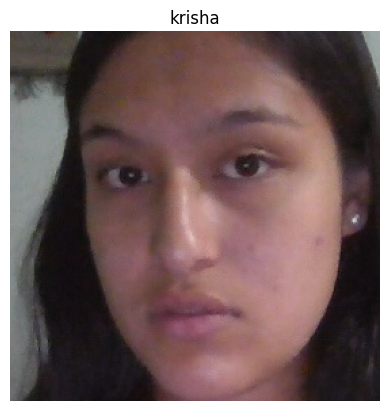

In [307]:
# visualize
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [308]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.3,
    height_shift_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Auto split from training folder
)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=8,
    subset='training',
    seed=42
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_data = val_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    class_mode="categorical",
    batch_size=8,
    subset='validation',
    seed=42
)


Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [309]:
import pandas as pd
def plot_loss_curves(history):
  loss=history.history["loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  val_loss=history.history["val_loss"]

  epochs = range(len(history.history["loss"]))
  #Plot loss
  plt.plot(epochs, loss, label="training loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [310]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np

model = tf.keras.Sequential([
    layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.3),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.1),
    metrics=['accuracy']
)

early_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)

history = model.fit(
    train_data,
    epochs=20,
    validation_data=val_data,
    callbacks=[early_stop]
)

val_loss, val_acc = model.evaluate(val_data)
print(f"\nFinal Validation Accuracy: {val_acc*100:.2f}%")

c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.3980 - loss: 1.1966 - val_accuracy: 0.8750 - val_loss: 0.9709
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.5425 - loss: 0.9597 - val_accuracy: 0.7917 - val_loss: 0.9281
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - accuracy: 0.7796 - loss: 0.8155 - val_accuracy: 1.0000 - val_loss: 0.8298
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 300ms/step - accuracy: 0.6775 - loss: 0.7789 - val_accuracy: 0.9167 - val_loss: 0.8082
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 302ms/step - accuracy: 0.7379 - loss: 0.7287 - val_accuracy: 0.9167 - val_loss: 0.7864
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 305ms/step - accuracy: 0.7799 - loss: 0.7238 - val_accuracy: 1.0000 - val_loss: 0.6976
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 308ms/step - accuracy: 0.6899 - loss: 0.7815 - val_accuracy: 1.0000 - val_loss: 0.7443
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.7453 - loss: 0.7528 - val_accuracy: 1.

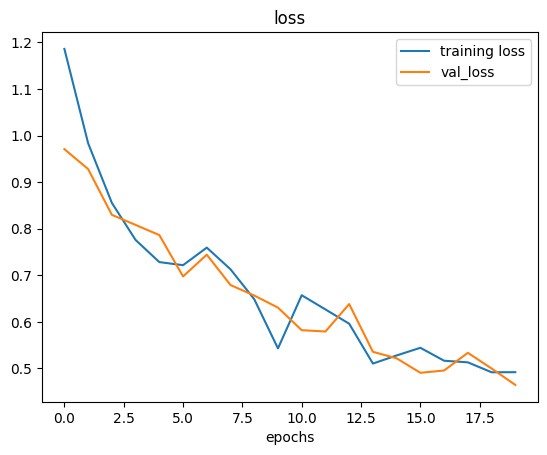

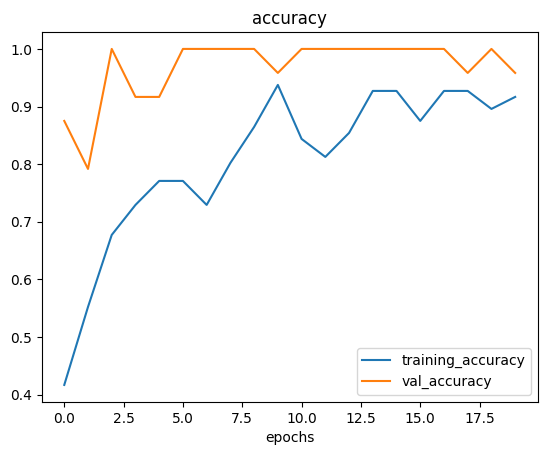

In [311]:
plot_loss_curves(history)

In [312]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, colour_channels).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [313]:
def pred_and_plot(model, filename, class_names=class_names, confidence_threshold=0.6):
    """
    Imports image, makes prediction, extracts ID, plots image with predicted class.
    Returns predicted ID or None if confidence too low.
    """
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img, axis=0))
    pred_probs = pred[0]
    
    max_confidence = tf.reduce_max(pred_probs).numpy()
    if max_confidence < confidence_threshold:
        pred_class = "Unknown"
        predicted_id = None
    else:
        pred_class = class_names[tf.argmax(pred_probs)]
        # Assuming ID is always the second element when split by '$'
        predicted_id = pred_class.split('$')[1] if '$' in pred_class else None

    # Plotting
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class} ({max_confidence:.2f})")
    plt.axis(False)
    plt.show()

    return predicted_id

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


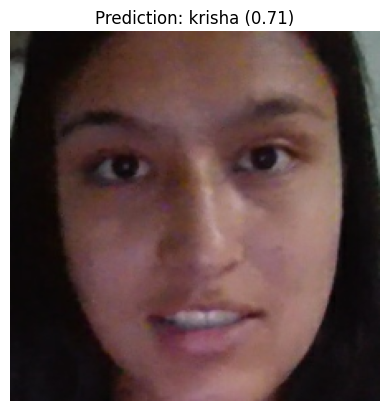

In [314]:
pred_and_plot(model,r"D:\FInal Year project\Face-Recognition-Attendance-System\model\our_data\test\krisha\subject_43.jpg",class_names=class_names)

Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Train samples used: 64
Test samples: 30
Feature dimension: 12288
KNN Training Accuracy: 1.0000
KNN Test Accuracy: 0.6667

Classification Report (Test Data):

              precision    recall  f1-score   support

     jeeswan       0.50      1.00      0.67        10
      krisha       1.00      1.00      1.00        10
      suyesh       0.00      0.00      0.00        10

    accuracy                           0.67        30
   macro avg       0.50      0.67      0.56        30
weighted avg       0.50      0.67      0.56        30



c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

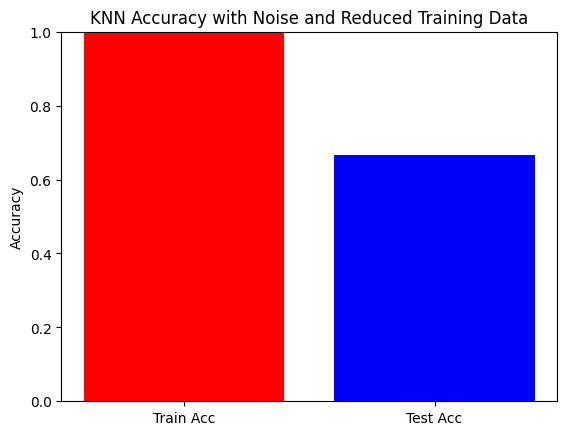

c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\1\miniconda3\envs\fvrs-env\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape

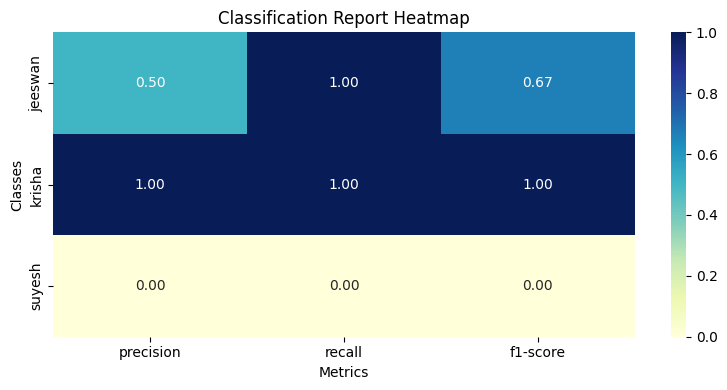

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import pandas as pd  # ✅ Added this missing import

IMG_SIZE = (64, 64)
BATCH_SIZE = 32

# Data generators WITHOUT rescaling (raw pixels)
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

def flatten_generator_data(data_gen, fraction=1.0):
    X, y = [], []
    max_batches = int(len(data_gen) * fraction)
    for i in range(max_batches):
        x_batch, y_batch = data_gen[i]
        X.append(x_batch.reshape(x_batch.shape[0], -1))
        y.append(np.argmax(y_batch, axis=1))
    X = np.concatenate(X)
    y = np.concatenate(y)
    return X, y

# Use only 50% of training data
X_train, y_train = flatten_generator_data(train_data, fraction=0.5)
X_test, y_test = flatten_generator_data(test_data)

print(f"Train samples used: {len(y_train)}")
print(f"Test samples: {len(y_test)}")
print(f"Feature dimension: {X_train.shape[1]}")

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

print(f"KNN Training Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"KNN Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# Classification report for test set
class_names = list(test_data.class_indices.keys())

# Plot overall accuracies
plt.bar(['Train Acc', 'Test Acc'],
        [accuracy_score(y_train, y_train_pred),
         accuracy_score(y_test, y_test_pred)],
        color=['red', 'blue'])
plt.ylim(0, 1)
plt.title('KNN Accuracy')
plt.ylabel('Accuracy')
plt.show()

# Generate classification report heatmap
report = classification_report(y_test, y_test_pred, target_names=class_names, output_dict=True)

df = pd.DataFrame(report).transpose()
df = df.iloc[:-3, :]  

plt.figure(figsize=(8, 4))
sns.heatmap(df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.xlabel("Metrics")
plt.ylabel("Classes")
plt.tight_layout()
plt.show()


In [ ]:
model.save('static/face_recognition_model.h5')